In [1]:
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings(action='once')
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Data Sets/results.csv')
time_columns = ['5k','10k','20k','half','25k','30k','35k','40k']
for col in time_columns:
    df[col]= df[col].str.replace('-', '')
    df[col] = pd.to_numeric(df[col])
df = df.dropna(subset=time_columns)
df.isnull().sum()

25k              0
age              0
name             0
division         0
10k              0
gender           0
half             0
official         0
bib              0
ctz          15308
country          0
overall          0
pace             0
state         1445
30k              0
5k               0
genderdiv        0
20k              0
35k              0
city             1
40k              0
dtype: int64

In [4]:
time_columns = ['5k','10k','20k','half','25k','30k','35k','40k', 'official']
clustering_col = time_columns + ['age']
dftimes = df[clustering_col]
for col in time_columns:
    dftimes[col] = dftimes[col] / dftimes['official']
dftimes.head()

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,5k,10k,20k,half,25k,30k,35k,40k,official,age
0,0.097910,0.200000,0.426843,0.450275,0.548625,0.682838,0.822112,0.941144,1.0,28
1,0.120000,0.233208,0.464302,0.489811,0.583170,0.701660,0.820981,0.941660,1.0,30
2,0.122191,0.237018,0.471964,0.497967,0.592391,0.711207,0.833627,0.949452,1.0,23
3,0.101549,0.211806,0.450978,0.474952,0.571073,0.693769,0.825512,0.943458,1.0,32
4,0.102270,0.208438,0.441986,0.465146,0.558931,0.686998,0.821830,0.938776,1.0,39


In [5]:
dftimes.isnull().sum()

5k          0
10k         0
20k         0
half        0
25k         0
30k         0
35k         0
40k         0
official    0
age         0
dtype: int64

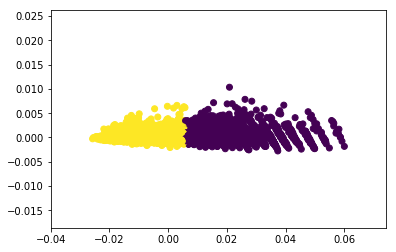

In [6]:
X_norm = normalize(dftimes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
model1 = KMeans(n_clusters=2).fit(X_norm)
cluster_assignment_kmeans = model1.predict(X_norm)
plt.scatter(X_pca[:,0], X_pca[:,1], c = cluster_assignment_kmeans)

In [9]:
kmeanscluster1 = df[cluster_assignment_kmeans == 0]
kmeanscluster2 = df[cluster_assignment_kmeans == 1]

<h2> KMeans Cluster Data Description </h2>
From below the main differences are the mean ages. Cluster 1 has a mean age of 28.8 and cluster 2 has a mean age of 46.6. Also cluster 1 happens to be more female, 53% of cluster 1 is female as opposed to 35% in cluster 2. Cluster 1 has slightly more participants from the USA compared at 89% to cluster 2 at 79%.

In [10]:
kmeanscluster1.describe()

,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
count,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000
mean,112.361138,28.846034,1579.463675,44.524808,94.398143,197.157405,6167.161520,7.527692,136.334757,22.329080,2463.971562,89.486834,161.193073,186.296108
std,13.237840,3.890567,1036.956217,5.169233,10.991375,24.531322,4760.168677,0.935743,16.349908,2.604356,2055.452198,10.405498,19.709450,23.194583
min,48.750000,18.000000,1.000000,18.180000,40.570000,88.320000,1.000000,3.380000,60.100000,8.900000,1.000000,38.550000,72.620000,83.150000
25%,103.320000,26.000000,689.000000,41.150000,86.950000,179.030000,1894.000000,6.830000,125.020000,20.620000,847.000000,82.470000,147.130000,169.430000
50%,112.200000,29.000000,1467.000000,44.450000,94.270000,198.120000,5391.000000,7.570000,136.550000,22.330000,1960.000000,89.370000,161.730000,187.180000
75%,122.480000,32.000000,2393.000000,48.620000,102.920000,214.100000,9573.000000,8.170000,148.780000,24.370000,3581.000000,97.500000,175.520000,202.600000
max,163.620000,35.000000,3834.000000,66.680000,138.670000,282.200000,17597.000000,10.770000,195.870000,33.220000,10648.000000,131.720000,227.200000,265.830000


In [11]:
kmeanscluster2.describe()

,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
count,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000
mean,120.495767,46.621484,913.209556,47.600113,101.129613,212.445854,9312.055743,8.110907,146.411629,23.850420,5084.934476,95.847041,173.418538,200.566310
std,11.686751,7.387497,828.412785,4.529745,9.704315,22.004267,4885.720596,0.839410,14.465138,2.273479,2666.569100,9.193420,17.546034,20.688613
min,48.320000,31.000000,1.000000,18.030000,40.270000,85.530000,1.000000,3.270000,59.450000,8.870000,1.000000,38.230000,71.180000,80.550000
25%,112.120000,41.000000,301.000000,44.370000,94.180000,197.080000,5147.000000,7.520000,136.130000,22.270000,3032.000000,89.270000,160.970000,185.920000
50%,121.270000,46.000000,695.000000,47.950000,101.770000,213.520000,9409.000000,8.150000,147.280000,24.000000,5021.000000,96.450000,174.300000,201.500000
75%,129.150000,51.000000,1232.000000,50.880000,108.320000,228.630000,13499.000000,8.730000,157.130000,25.480000,6844.000000,102.630000,186.330000,215.770000
max,158.600000,80.000000,3822.000000,62.580000,136.200000,284.230000,17598.000000,10.850000,191.000000,31.900000,10647.000000,130.350000,229.500000,268.400000


In [25]:
kmeanscluster1.gender.value_counts(1)

F    0.525883
M    0.474117
Name: gender, dtype: float64

In [24]:
kmeanscluster2.gender.value_counts(1)

M    0.646932
F    0.353068
Name: gender, dtype: float64

In [28]:
kmeanscluster1.country.value_counts(1)[0:5]

USA    0.889802
CAN    0.054877
GBR    0.009331
MEX    0.004221
AUS    0.003999
Name: country, dtype: float64

In [29]:
kmeanscluster2.country.value_counts(1)[0:5]

USA    0.785770
CAN    0.110621
GBR    0.011772
JPN    0.008223
MEX    0.007444
Name: country, dtype: float64

In [26]:
kmeanscluster1.city.value_counts(1)[0:5]

Chicago       0.032659
New York      0.031993
Washington    0.017329
Boston        0.015996
Cambridge     0.013108
Name: city, dtype: float64

In [27]:
kmeanscluster2.city.value_counts(1)[0:5]

New York    0.014889
Chicago     0.010648
Toronto     0.010215
Austin      0.008310
Portland    0.006492
Name: city, dtype: float64

<h2> Mean Shift </h2>
Only got 1 cluster after MeanShift clustering

In [36]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X_norm, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_norm)
cluster_assignment_ms = ms.labels_

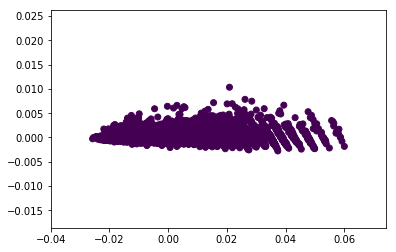

In [39]:
dftimesclusterms = df[cluster_assignment_ms == 0]
dftimesclusterms2 = df[cluster_assignment_ms == 1]
plt.scatter(X_pca[:,0], X_pca[:,1], c = cluster_assignment_ms)

<h2> Spectral Clustering </h2>
Similar to KMeans clustering.  The age difference were about the same.  The cluster sizes were about the same.

In [41]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=2)
sc.fit(X_norm)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

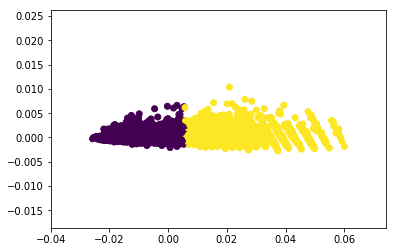

In [44]:
predict=sc.fit_predict(X_norm)
sccluster1 = df[predict == 0]
sccluster2 = df[predict == 1]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict)
plt.show()

In [45]:
sccluster1.describe()

,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
count,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000,11519.000000
mean,120.506972,46.656394,909.471569,47.603446,101.138291,212.462235,9316.420870,8.111534,146.426145,23.851978,5089.505252,95.855136,173.434010,200.582478
std,11.690517,7.370247,825.538584,4.531123,9.707582,22.011712,4887.361729,0.839691,14.470124,2.274162,2667.402087,9.196538,17.552929,20.696589
min,48.320000,31.000000,1.000000,18.030000,40.270000,85.530000,1.000000,3.270000,59.450000,8.870000,1.000000,38.230000,71.180000,80.550000
25%,112.120000,41.000000,300.000000,44.370000,94.180000,197.080000,5147.500000,7.520000,136.130000,22.270000,3037.000000,89.275000,160.990000,185.925000
50%,121.270000,46.000000,692.000000,47.970000,101.780000,213.530000,9415.000000,8.150000,147.280000,24.000000,5027.000000,96.470000,174.320000,201.520000
75%,129.170000,51.000000,1226.000000,50.900000,108.330000,228.675000,13506.500000,8.730000,157.150000,25.480000,6848.500000,102.650000,186.350000,215.800000
max,158.600000,80.000000,3822.000000,62.580000,136.200000,284.230000,17598.000000,10.850000,191.000000,31.900000,10647.000000,130.350000,229.500000,268.400000


In [46]:
sccluster2.describe()

,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
count,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000
mean,112.393665,28.890628,1583.963175,44.539398,94.426569,197.230417,6179.652040,7.530472,136.373433,22.336527,2472.011687,89.513956,161.245431,186.362029
std,13.219628,3.910268,1036.849062,5.163462,10.976861,24.506033,4757.284057,0.934782,16.325857,2.601523,2055.665398,10.391893,19.682470,23.166252
min,48.750000,18.000000,1.000000,18.180000,40.570000,88.320000,1.000000,3.380000,60.100000,8.900000,1.000000,38.550000,72.620000,83.150000
25%,103.330000,26.000000,693.500000,41.180000,86.970000,179.110000,1914.500000,6.830000,125.025000,20.630000,855.500000,82.500000,147.160000,169.440000
50%,112.270000,29.000000,1475.000000,44.500000,94.350000,198.270000,5422.000000,7.570000,136.630000,22.350000,1968.000000,89.420000,161.850000,187.280000
75%,122.500000,32.000000,2398.500000,48.620000,102.950000,214.140000,9590.500000,8.180000,148.780000,24.370000,3596.000000,97.530000,175.550000,202.690000
max,163.620000,35.000000,3834.000000,66.680000,138.670000,282.200000,17597.000000,10.770000,195.870000,33.220000,10648.000000,131.720000,227.200000,265.830000


In [47]:
sccluster1.gender.value_counts(1)

M    0.647452
F    0.352548
Name: gender, dtype: float64

In [48]:
sccluster2.gender.value_counts(1)

F    0.52591
M    0.47409
Name: gender, dtype: float64

In [50]:
sccluster1.country.value_counts(1)[0:5]

USA    0.785572
CAN    0.110687
GBR    0.011720
JPN    0.008247
MEX    0.007466
Name: country, dtype: float64

In [51]:
sccluster2.country.value_counts(1)[0:5]

USA    0.889526
CAN    0.055127
GBR    0.009482
MEX    0.004190
AUS    0.003969
Name: country, dtype: float64

<h2> Affinity Propogation </h2>

In [52]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_norm)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 9212


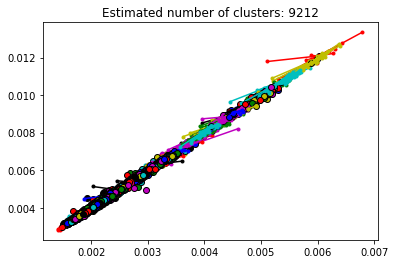

In [54]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_norm[cluster_centers_indices[k]]
    plt.plot(X_norm[class_members, 0], X_norm[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_norm[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()